In [18]:
install.packages(kernlab)

ERROR: Error in install.packages(kernlab): object 'kernlab' not found


In [19]:
library(caret)
library(ellipse)
library(e1071)
library(kernlab)

ERROR: Error in library(kernlab): there is no package called ‘kernlab’


In [2]:
# attach the iris dataset to the environment
data(iris)

# rename the dataset
dataset <- iris

In [3]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)

# select 20% of the data for validation
validation <- dataset[-validation_index,]

# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

In [4]:
# dimensions of dataset
dim(dataset)

[1] 120   5

In [5]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [6]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa


In [7]:
# list the levels for the class
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [8]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


In [9]:
# summarize attribute distributions
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.400   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.575   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.200   Median :1.300  
 Mean   :5.864   Mean   :3.076   Mean   :3.766   Mean   :1.202  
 3rd Qu.:6.400   3rd Qu.:3.400   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

In [10]:
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

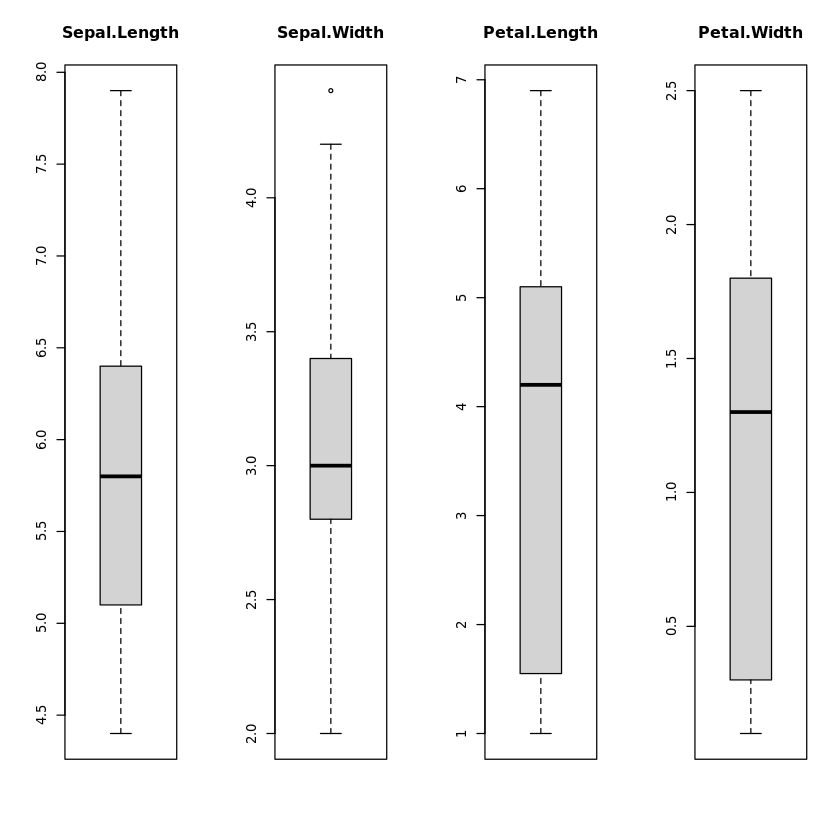

In [11]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
    }

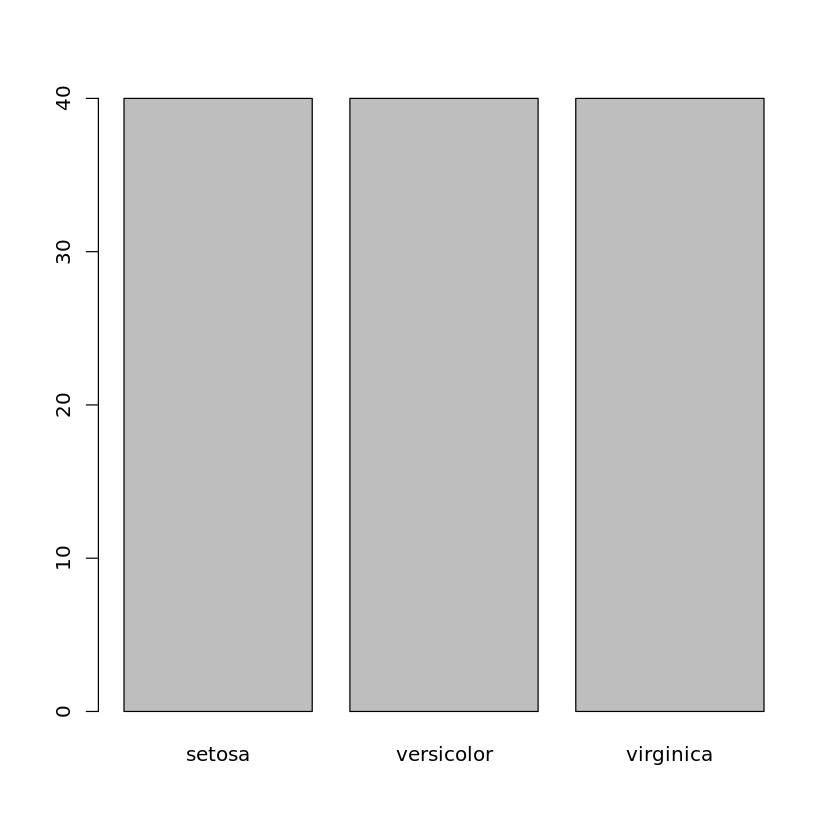

In [12]:
# barplot for class breakdown
plot(y)

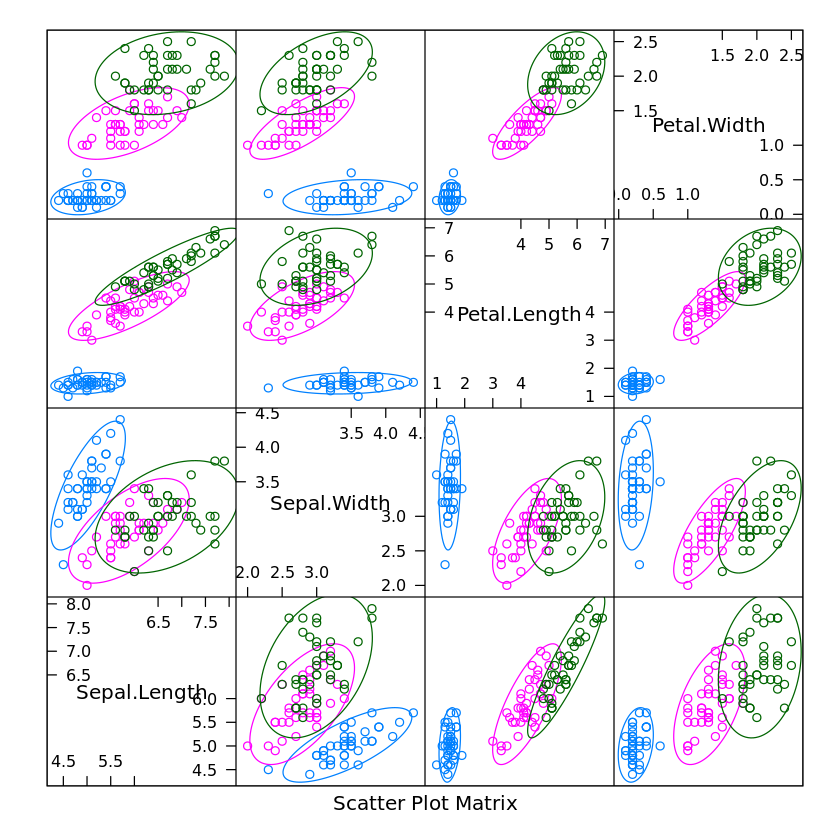

In [13]:
# scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

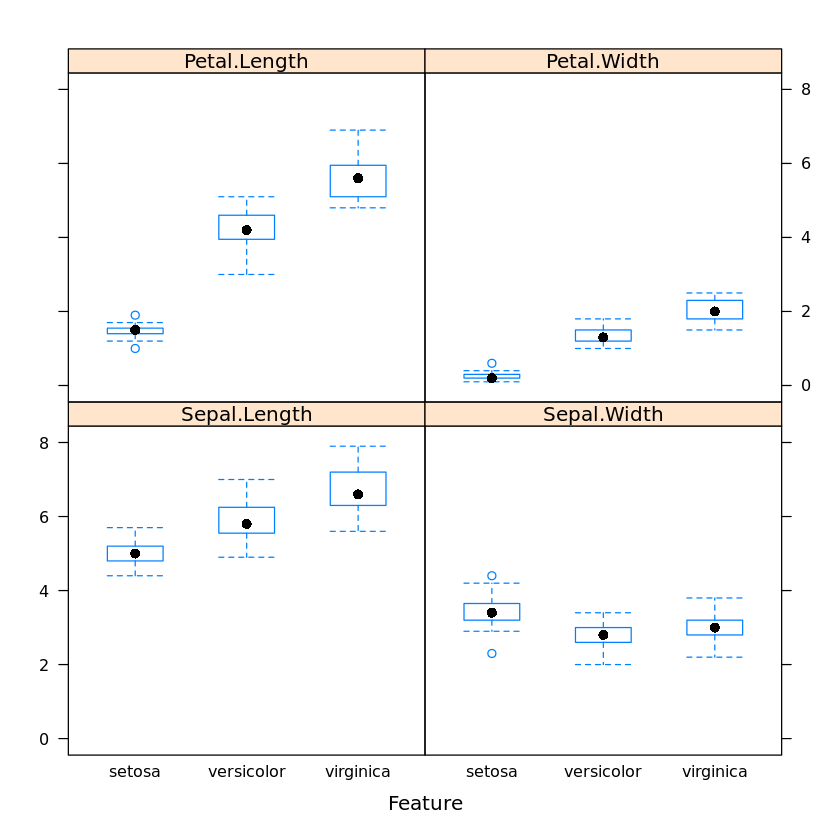

In [14]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

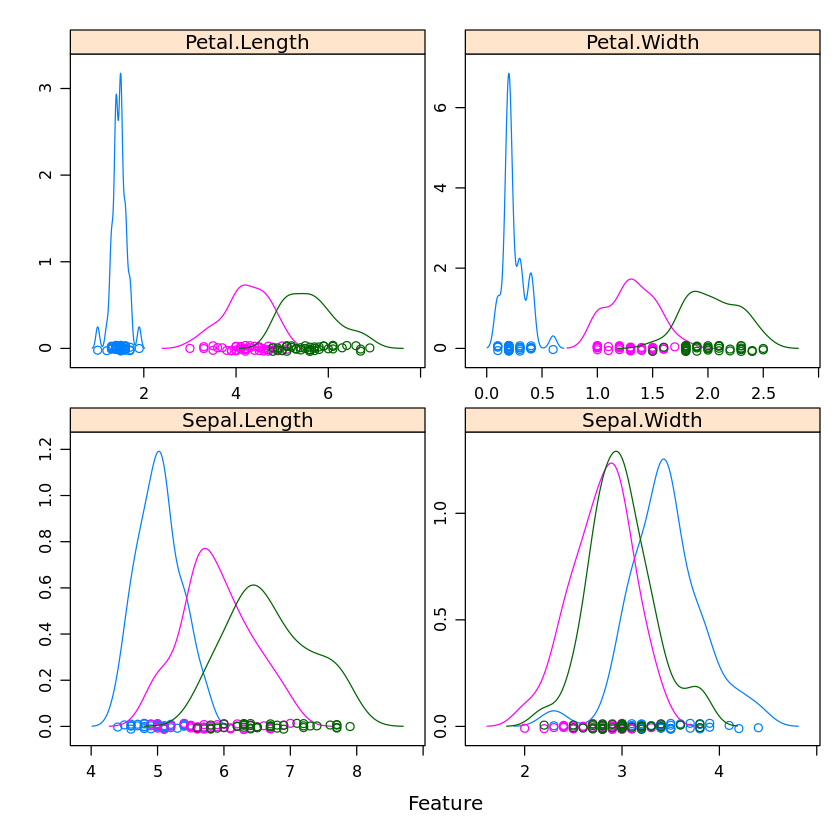

In [15]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

In [16]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [17]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)

# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)

# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)

# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)

# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

1 package is needed for this model and is not installed. (kernlab). Would you like to try to install it now?

ERROR: Error: Required package is missing


In [20]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)

ERROR: Error in resamples(list(lda = fit.lda, cart = fit.cart, knn = fit.knn, : object 'fit.svm' not found
